In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
sample = datasets.load_breast_cancer()  # Use breast cancer dataset from sklearn
X = sample.data
Y = sample.target

In [2]:
# Add bias term
m = len(Y)
X_0 = np.ones((m, 1))
X = np.hstack([X_0, X])
theta = np.zeros(X.shape[1])

In [3]:
# Split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# defining function for computing the cost for linear regression
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return J

In [6]:
def compute_accuracy(X, y, theta):
    preds = (sigmoid(X.dot(theta)) >= 0.5).astype(int)
    return np.mean(preds == y)

In [7]:
# defining function for gradient descent algorithm
def gradient_descent(Xt, Yt, Xv, Yv, theta, alpha, iterations):
  train_cost_history = np.zeros(iterations)
  valid_cost_history = np.zeros(iterations)
  train_acc_history = np.zeros(iterations)
  valid_acc_history = np.zeros(iterations)
  m = len(Yt)
  for i in range(iterations):
    predictions = sigmoid(Xt.dot(theta))
    errors = np.subtract(predictions, Yt)
    sum_delta = (alpha / m) * Xt.transpose().dot(errors)
    theta = theta - sum_delta
    train_cost_history[i] = compute_cost(Xt, Yt, theta)
    valid_cost_history[i] = compute_cost(Xv, Yv, theta)
    train_acc_history[i] = compute_accuracy(Xt, Yt, theta)
    valid_acc_history[i] = compute_accuracy(Xv, Yv, theta)

  return theta, train_cost_history, valid_cost_history, train_acc_history, valid_acc_history

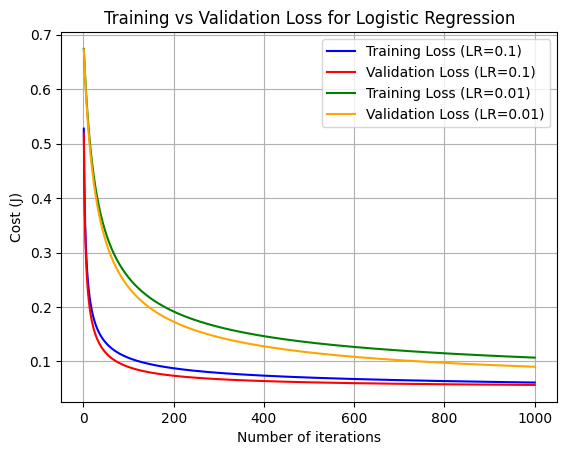

In [8]:
theta = np.zeros(X.shape[1])
iterations = 1000

alpha = 0.1
theta_1, train_cost_1, valid_cost_1, train_acc_1, valid_acc_1 = gradient_descent(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)

alpha = 0.01
theta_2, train_cost_2, valid_cost_2, train_acc_2, valid_acc_2 = gradient_descent(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)

plt.plot(range(1, iterations+1), train_cost_1, color='blue', label='Training Loss (LR=0.1)')
plt.plot(range(1, iterations+1), valid_cost_1, color='red', label='Validation Loss (LR=0.1)')
plt.plot(range(1, iterations+1), train_cost_2, color='green', label='Training Loss (LR=0.01)')
plt.plot(range(1, iterations+1), valid_cost_2, color='orange', label='Validation Loss (LR=0.01)')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training vs Validation Loss for Logistic Regression')
plt.legend()
plt.show()

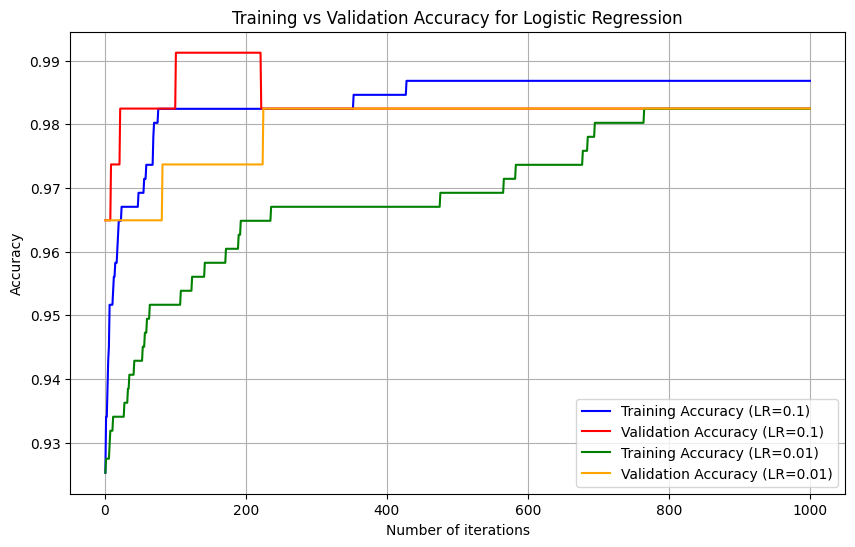

In [9]:
plt.plot(range(1, iterations+1), train_acc_1, color='blue', label='Training Accuracy (LR=0.1)')
plt.plot(range(1, iterations+1), valid_acc_1, color='red', label='Validation Accuracy (LR=0.1)')
plt.plot(range(1, iterations+1), train_acc_2, color='green', label='Training Accuracy (LR=0.01)')
plt.plot(range(1, iterations+1), valid_acc_2, color='orange', label='Validation Accuracy (LR=0.01)')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Logistic Regression')
plt.legend()
plt.show()

Accuracy : 0.9824561403508771
Precision: 0.9859154929577465
Recall   : 0.9859154929577465
F1 Score : 0.9859154929577465


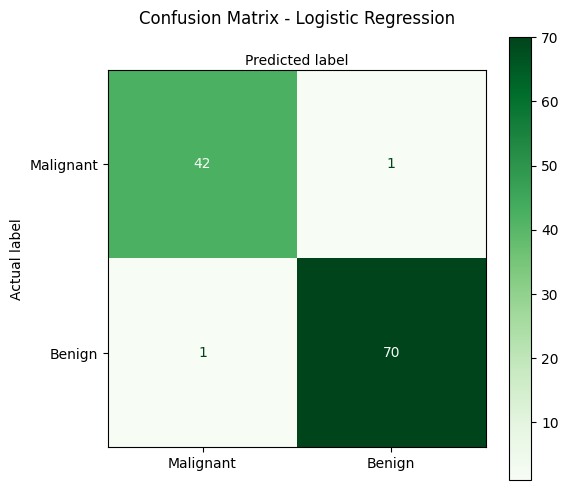

In [10]:
Y_prob = sigmoid(X_test.dot(theta_1))
Y_pred = (Y_prob >= 0.5).astype(int)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print performance results
print("Accuracy :" ,accuracy)
print("Precision:" ,precision)
print("Recall   :" ,recall)
print("F1 Score :" ,f1)

class_names = ["Malignant", "Benign"]
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(6,5))

# Set ticks manually
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Greens', ax=ax)

plt.tight_layout()
plt.title("Confusion Matrix - Logistic Regression", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()